# Pattern Recognition 2022-23 1st Lab: Optical Digit Recognition<br>

Ηλιόπουλος Γεώργιος: 03118815 <br>
Σερλής Αναστάσιος Εμανουήλ - 03118125<br>
<br>
Full Lab1 Code

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.model_selection import KFold, learning_curve, ShuffleSplit, cross_validate, train_test_split
%matplotlib inline
from matplotlib.cm import rainbow
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
import warnings
warnings.filterwarnings("ignore")

#### Βήμα 1: Εισαγωγή των δεδομένων 

In [2]:
def read_data (file):
    df = pd.read_csv(file, sep=" ", header = None) #read txt file as panda data frame
    df = df.to_numpy() #convert to numpy array
    labels = df[:, 0] #keep first column, where the labels are
    data = df[:, 1:257] #keep the other columns, where the 256 features are
    print ("There are {} samples with {} features each.".format(len(df[:, 0]), df[:, 1:257].shape[1]))
    return data, labels

In [3]:
X_train, y_train = read_data("./data/train.txt")
X_test, y_test = read_data("./data/test.txt")

There are 7291 samples with 256 features each.
There are 2007 samples with 256 features each.


In [4]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(7291, 256) (7291,) (2007, 256) (2007,)


#### Βήμα 2: Απεικόνιση 131ου ψηφίου

Text(0.5, 1.0, '131th digit')

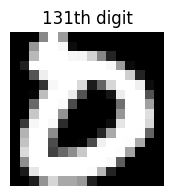

In [5]:
fig = plt.figure(figsize=(2,2))
plt.axis('off')
im = X_train[130].reshape(16, 16) # reshaping to form a 16x16 grid 
plt.imshow(im, "gray")
plt.title("131th digit")

#### Βήμα 3: Απεικόνιση ενός τυχαίου δείγματος από κάθε κλάση

In [6]:
y = []
for i in range(9):
    y.append(i)
    y[i] = []

In [7]:
samples = [] # initializing a list
for i in range(10):
    samples.append(i)
    samples[i] = [] # initializing each element as a list
    
# saving the pixels of each digit in the list y
# for example all the pixels of all digits '7' are saved in y[7]
for z in range(10):
    samples[z] = X_train[y_train == z]

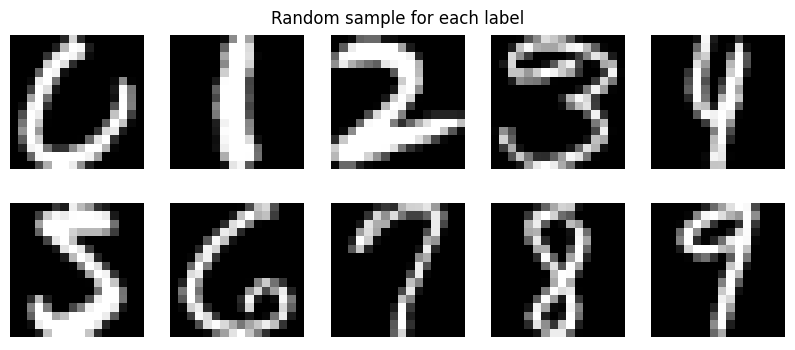

In [8]:
fig = plt.figure(figsize=(10,4))
plt.title("Random sample for each label")
plt.axis('off')
for i in range(10):
    z = random.randint(0, len(samples[i]) - 1) #getting a ramdom sample of each digit
    im = samples[i][z].reshape(16, 16)
    fig.add_subplot(2,5,i+1)
    plt.imshow(im, "gray")
    plt.axis('off')

#### Βήμα 4: Υπολογισμός μέση τιμής του pixel (10, 10) των μηδενικών

In [9]:
a1 = np.mean(samples[0][:,10*16+10-1])  # samples[0] is a np.array wich contains all the samples '0', so
                                        # we calculate the mean value of all '0' samples in the (10*16+10-1)th
                                        # column, considering 1-based indexing, where the pixel (10, 10) is
print("The mean value of the pixel (10,10) for all the '0' samples in the train set is {}.".format(a1))

The mean value of the pixel (10,10) for all the '0' samples in the train set is -0.8568450586264656.


#### Βήμα 5: Υπολογισμός διασποράς του pixel (10, 10) των μηδενικών

In [10]:
a2 = np.var(samples[0][:,10*16+10-1])
print("The varience of the pixel (10,10) for all the '0' samples in the train set is {}.".format(a2))

The varience of the pixel (10,10) for all the '0' samples in the train set is 0.16989574064978716.


#### Βήμα 6: Υπολογισμός μέσης τιμής και διασποράς όλων των pixel όλων των μηδενικών

In [11]:
samples_mean = [] # initializing a list to save the mean values of each class
samples_var = [] # initializing a list to save the varience values of each class
for i in range(10):
    samples_mean.append(i)
    samples_var.append(i)
    samples_mean[i] = [] # initializing each element as a list
    samples_var[i] = []

In [12]:
samples_mean[0] = np.mean(samples[0], axis=0)
samples_var[0] = np.var(samples[0], axis=0)

#### Βήμα 7: Απεικόνιση μέσης τιμής των μηενικών

Text(0.5, 1.0, "Mean Value of class '0'")

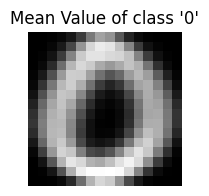

In [13]:
fig = plt.figure(figsize=(2,2))
plt.axis('off')
im = samples_mean[0].reshape(16, 16)
plt.imshow(im, "gray")
plt.title("Mean Value of class '0'")

#### Βήμα 8: Απεικόνιση διασποράς των μηδενικών

Text(0.5, 1.0, "Varience Value of class '0'")

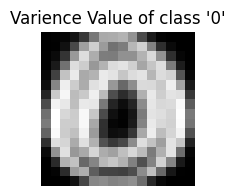

In [14]:
fig = plt.figure(figsize=(2,2))
plt.axis('off')
im = samples_var[0].reshape(16, 16)
plt.imshow(im, "gray")
plt.title("Varience Value of class '0'")

#### Βήμα 9: Υπολογισμός και απεικόνιση μέσης τιμής και διασποράς όλων κλάσεων

In [15]:
for i in range(10):
    samples_mean[i] = np.mean(samples[i], axis=0)
    samples_var[i] = np.var(samples[i], axis=0)

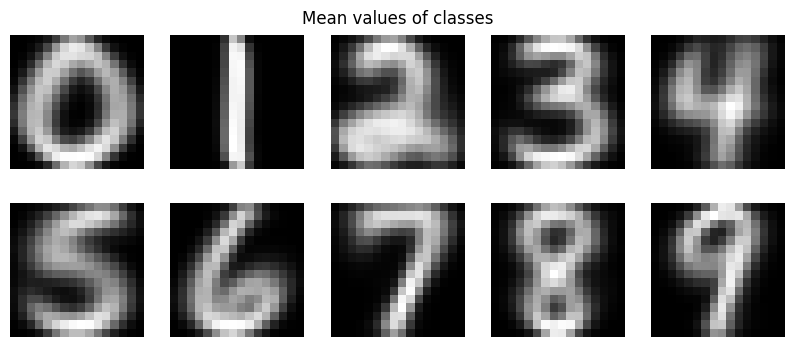

In [16]:
fig = plt.figure(figsize=(10,4))
plt.title("Mean values of classes")
plt.axis('off')
for i in range(10):
    im = samples_mean[i].reshape(16, 16)
    fig.add_subplot(2,5,i+1)
    plt.imshow(im, "gray")
    plt.axis('off')

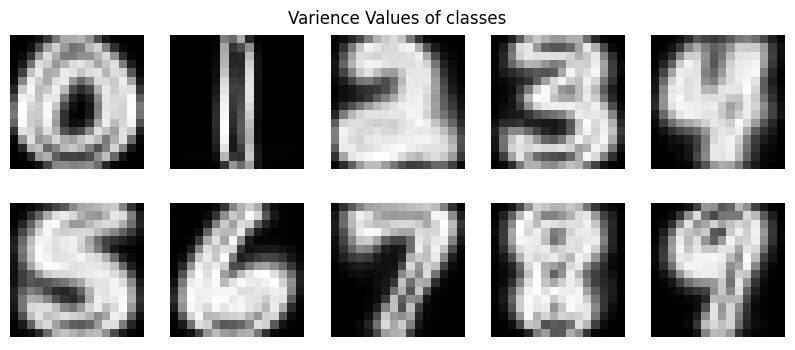

In [17]:
fig = plt.figure(figsize=(10,4))
plt.title("Varience Values of classes")
plt.axis('off')
for i in range(10):
    im = samples_var[i].reshape(16, 16)
    fig.add_subplot(2,5,i+1)
    plt.imshow(im, "gray")
    plt.axis('off')

#### Βήμα 10: Ταξινόμηση του 101ου ψηφίου του test set βάσει του ευκλείδειου ταξινομητή

The digit we want to classify is the 101th didgit of the test set and as we can see below it is a '0'.
The euclidean classifier classifies it as a '0' which is True.


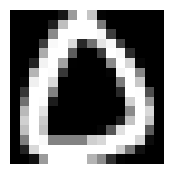

In [18]:
digit = 101

dist = np.linalg.norm(samples_mean - X_test[digit-1], ord=None, axis=1) 
# linag.norm with ord=None calculates the 2-norm wich is equal to the euclidean distance, 
# it returns the euclidean diastance between the test digit and ecah digits mean values

pred = np.argmin(dist) #returns the index of the minimum dist wich is the prediction

print("The digit we want to classify is the {}th didgit of the test set and as \
we can see below it is a '{}'.".format(digit, int(y_test[digit-1])))

fig = plt.figure(figsize=(2,2))
plt.axis('off')
im = X_test[digit-1].reshape(16, 16)
plt.imshow(im, "gray")

print("The euclidean classifier classifies it as a '{}' which is {}.".format(pred, str(pred == y_test[digit-1])))

#### Βήμα 11: Ταξινόμηση όλων των ψηφίων βάσει του ευκλείδειου ταξινομητή και υπολογισμός ποσοστού επιτυχίας

In [19]:
# function that calculates the minimum Euclidean Distance --> It predicts the class
def min_euclidean_distance(i):
    p = np.argmin(np.linalg.norm((i - samples_mean), ord=None, axis=1))
    return p

In [20]:
predicts = [] #initializing a list to save the predictions of each test sample
for i in range(len(y_test)):
    predicts.append(min_euclidean_distance(X_test[i])) 

In [21]:
count = 0
for i in range(len(y_test)):
    if y_test[i] == predicts[i]:
        count += 1 # counting how many correct predictions the classifier made

acc1 = count / len(y_test)

print("The accuracy of the euclidean classifier is {:.2f}%.".format(acc1 * 100))

The accuracy of the euclidean classifier is 81.42%.


#### Βήμα 12: Υλοποίηση του ευκλείδειου ταξινομητή ως μία κλάση σαν ένα scikit-learn estimator

In [22]:
class EuclideanDistanceClassifier(BaseEstimator, ClassifierMixin):
    """Classify samples based on the distance from the mean feature value"""

    def __init__(self):
        self.X_mean_ = None


    def fit(self, X, y):
        """
        This should fit classifier. All the "work" should be done here.
        Calculates self.X_mean_ based on the mean
        feature values in X for each class.
        self.X_mean_ becomes a numpy.ndarray of shape
        (n_classes, n_features)
        fit always returns self.
        """
        n_classes = len(np.unique(y)) #calculate how many different classes there are
        n_samples, n_features = X.shape #saving how many features there are
        self.X_mean_ = np.zeros((n_classes, n_features)) #initialing a np array for X_mean_
        
        samples = [] # initializing a list to save thw features of each sample divided in classes
        for i in range(n_classes):
            samples.append(i)
            samples[i] = [] # initializing each element as a list

        for i in range(n_classes):
            samples[i] = X[y == i] #seperating the samples in classes
            
        for i in range(n_classes):
            self.X_mean_[i, :] = np.mean(samples[i], axis=0) # calculating the mean values of each class
        
        return self

    def predict(self, X):
        """
        Make predictions for X based on the
        euclidean distance from self.X_mean_
        """
        predicts = []
        for i in range(len(X)):
            predicts.append(np.argmin(np.linalg.norm((X[i] - self.X_mean_), ord=None, axis=1))) # makes the prediction
        predicts = np.array(predicts)
        return predicts

    def score(self, X, y):
        """
        Return accuracy score on the predictions
        for X based on ground truth y
        """
        count = 0
        y_pred = self.predict(X)
        for i in range(len(y)):
            if y[i] == y_pred[i]:
                count += 1 # countng the correct predictions
        acc = count / len(y)
        return acc

#### Βήμα 13 

#### α) Υπολογισμός score του ευκλείδειου ταξινομητή με χρήση 5-fold cross-validation

In [23]:
clf = EuclideanDistanceClassifier()
resutls = cross_validate(clf, X_train, y = y_train, cv = 5, return_train_score = True, scoring = ['accuracy'])
acc2 = resutls["train_accuracy"].mean() * 100
print("The score of the Euclidean Classifie with 5-fold cross-validation is \
{:.2f}%.\nBefore 5-fold cross-validation it was {:.2f}%.\nSo it is more by {:.2f}%.".format(acc2, acc1, acc2 - acc1))

The score of the Euclidean Classifie with 5-fold cross-validation is 85.14%.
Before 5-fold cross-validation it was 0.81%.
So it is more by 84.33%.


#### β) Περιοχές απόφασης του ευκλείδειου ταξινομητή

In [24]:
#b

def plot_clf(clf, X, y, labels, title = "Decision Surfaces", dots = "on"): 
# parameter dots specifies if we will plot the samples or not
    fig, ax = plt.subplots()
    
    # Set-up grid for plotting.
    X0, X1 = X[:, 0], X[:, 1]
    
    x_min, x_max = X0.min() - 1, X0.max() + 1
    y_min, y_max = X1.min() - 1, X1.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, .05),
                         np.arange(y_min, y_max, .05))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    out = ax.contourf(xx, yy, Z + 0.5, cmap=plt.cm.coolwarm, alpha=0.8)
       
    colors = rainbow(np.linspace(0, 1, len(labels)))
    
    # we dont always plot the samples to see better the decision surfaces
    if dots == "on":
        for i in range(10):
            zeros = ax.scatter(
                X0[y == i], X1[y == i],
                c=colors[i], label=labels[i],
                s=60, alpha=0.8, edgecolors='k')
        ax.legend()
        title = "Decision Surfaces and Samples"
        
    #ax.set_ylabel("Main Component 1")
    #ax.set_xlabel("Main Component 2")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    plt.show()

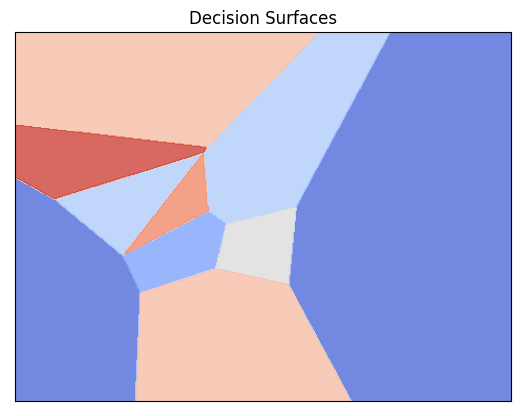

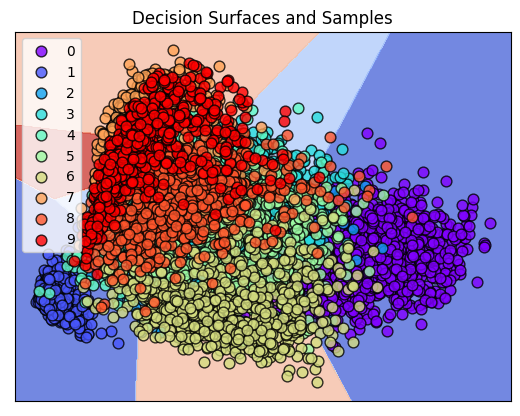

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)   # reducing the dimetions 
pca.fit(X_train)
X_new = pca.transform(X_train)

eucl_new = EuclideanDistanceClassifier()  # fiting a new classifier with the reduced 2 features
eucl_new.fit(X_new, y_train)

labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

plot_clf(eucl_new, X_new, y_train, labels, dots = y)
plot_clf(eucl_new, X_new, y_train, labels)

#### γ) Καμπύλη εκμάθησης του ευκλείδειου ταξινομητή (learning curve)

<module 'matplotlib.pyplot' from 'C:\\Users\\manos\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages\\matplotlib\\pyplot.py'>

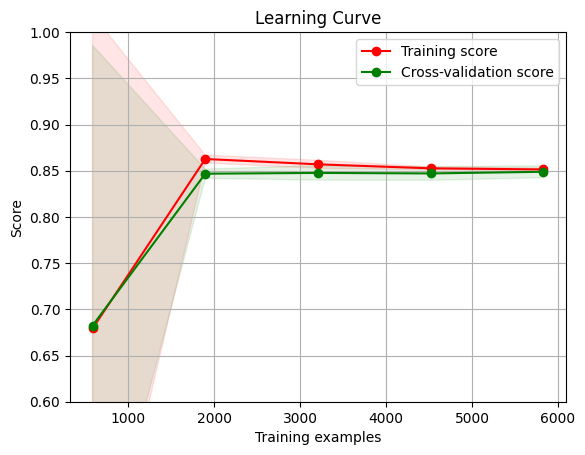

In [26]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    EuclideanDistanceClassifier(), X_train, y_train, cv=5, n_jobs=-1, 
    train_sizes=np.linspace(.1, 1.0, 5))

def plot_learning_curve(train_scores, test_scores, train_sizes, ylim=(0, 1)):
    plt.figure()
    plt.title("Learning Curve")
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

plot_learning_curve(train_scores, test_scores, train_sizes, ylim=(.6, 1))

#### Βήμα 14: Υπολογισμός a-priori πιθανότητες για κάθε κατηγορία (class priors)

In [27]:
from collections import Counter

def calculate_priors(X,y): #calculate prior probabilities routine
    Y_train_size=np.shape(y)[0]
    y_train_temp=sorted(y) 
    labels_prior=list(Counter(y_train_temp).keys())
    labels_freq=list(Counter(y_train_temp).values()) #count number of instances
    labels_freq_new= [x / Y_train_size for x in labels_freq] #find percentages for each label
    return labels_freq_new

labels_freq_new=calculate_priors(X_train,y_train) #call routine
#print("The prior propabilities for each label (0 to 9) are:", labels_freq_new)

for i in range(10):
    print("P(digit = '{}') = {:.4f}".format(i, labels_freq_new[i]))

P(digit = '0') = 0.1638
P(digit = '1') = 0.1378
P(digit = '2') = 0.1003
P(digit = '3') = 0.0902
P(digit = '4') = 0.0894
P(digit = '5') = 0.0763
P(digit = '6') = 0.0911
P(digit = '7') = 0.0885
P(digit = '8') = 0.0743
P(digit = '9') = 0.0883


#### Βήμα 15 και 16: Υλοποίηση Naive Bayes Classifier και σύγκριση με υλοποίηση της scikit-learn

In [28]:
samples_var_new=[x+1e-7 for x in samples_var] #for low variance values

In [29]:
from scipy.stats import multivariate_normal as mn

class CustomNBClassifier(BaseEstimator, ClassifierMixin):
    """Custom implementation Naive Bayes classifier"""

    def __init__(self, use_unit_variance=False):
        self.X_mean_=None
        self.X_var_=None
        self.prior=None
        self.use_unit_variance = use_unit_variance


    def fit(self, X, y):
        """
        This should fit classifier. All the "work" should be done here.
        Calculates self.X_mean_ based on the mean
        feature values in X for each class.
        self.X_mean_ becomes a numpy.ndarray of shape
        (n_classes, n_features)
        fit always returns self.
        """
        n_samples, n_features = X.shape
        self.X_mean_=samples_mean #use mean and variance values for X from step 9a
        if not self.use_unit_variance:
            self.X_var_=samples_var_new
        else:
            self.X_var_=np.ones((n_samples,n_features)) #case of unit value variance
        self.prior=calculate_priors(X,y)

        return self
        
    def predict(self, X):
        all_probs=[]
        for i in range(10): #calculates multidimensional PDF for all images (per class)
            all_probs.append(self.prior[i]*mn.pdf(X,self.X_mean_[i],self.X_var_[i],allow_singular=True)) 
        max_indices=np.argmax(all_probs,axis=0) #takes maximum digit PDF for each image
        return(np.array(max_indices))


    def score(self, X, y): #returns accuracy
        """
        Return accuracy score on the predictions
        for X based on ground truth y
        """
        count = 0
        y_pred = self.predict(X)
        for i in range(len(y)):
            if y[i] == y_pred[i]:
                count += 1
        acc = count / len(y)
        return acc


In [30]:
NB_classifier = CustomNBClassifier(use_unit_variance = False) 
NB_classifier.fit(X_train, y_train)
NB_pred = NB_classifier.predict(X_test) 
#print(NB_pred) #predicted labels on testing set

NB_score = NB_classifier.score(X_test, y_test)
print("Custom Gaussian Naive Bayes classifier accuracy: {}%".format(np.round(NB_score*100, 2)))

Custom Gaussian Naive Bayes classifier accuracy: 73.04%


In [31]:
from sklearn.naive_bayes import GaussianNB

ready_GaussianNB = GaussianNB() #import sklearn's  implementation
ready_GaussianNB.fit(X_train, y_train)

ready_GaussianNB_score = ready_GaussianNB.score(X_test, y_test)
print("Scikit's Gaussian Naive Bayes classifier accuracy: {}%".format(np.round(ready_GaussianNB_score*100, 2))) 

Scikit's Gaussian Naive Bayes classifier accuracy: 71.95%


In [32]:
NB_classifier_new = CustomNBClassifier(use_unit_variance = True) #1 unit variances
NB_classifier_new.fit(X_train, y_train)
NB_pred_new = NB_classifier_new.predict(X_test)
#print(NB_pred_new)

NB_score_new = NB_classifier_new.score(X_test, y_test)
print("Custom Gaussian Naive Bayes classifier accuracy with unit variance is: {}%".format(np.round(NB_score_new*100, 2)))

Custom Gaussian Naive Bayes classifier accuracy with unit variance is: 81.27%


#### Βήμα 17: Σύγκριση ταξινομητών

In [33]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

#SVM-linear
clf1 = SVC(kernel='linear')
clf1.fit(X_train,y_train)
results1 = cross_validate(clf1, X_train, y = y_train, cv = 5, return_train_score = True, scoring = ['accuracy'])
acc1 = results1["train_accuracy"].mean() * 100
val1=clf1.score(X_test,y_test)
print("The score of the SVM classifier with linear kernel and 5-fold cross-validation is \
{:.2f}%.\nValidation accuracy of SVM with linear kernel is {:.2f}%.".format(acc1,val1*100))

The score of the SVM classifier with linear kernel and 5-fold cross-validation is 99.99%.
Validation accuracy of SVM with linear kernel is 92.63%.


In [34]:
"""
def all_score(clff):
    #clf = SVC(kernel='rbf')
    clff.fit(X_train,y_train)
    results = cross_validate(clff, X_train, y = y_train, cv = 5, return_train_score = True, scoring = ['accuracy'])
    acc = results["train_accuracy"].mean() * 100
    val=clff.score(X_test,y_test)
    return acc, val
"""
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

#SVM-rbf

clf1 = SVC(kernel='rbf')
clf1.fit(X_train,y_train)
results1 = cross_validate(clf1, X_train, y = y_train, cv = 5, return_train_score = True, scoring = ['accuracy'])
acc1 = results1["train_accuracy"].mean() * 100
val1=clf1.score(X_test,y_test)
print("The score of the SVM classifier with rbf kernel and 5-fold cross-validation is \
{:.2f}%.\nValidation accuracy of SVM with rbf kernel is {:.2f}%.".format(acc1,val1*100))

The score of the SVM classifier with rbf kernel and 5-fold cross-validation is 99.38%.
Validation accuracy of SVM with rbf kernel is 94.72%.


In [35]:
#KNN
clf2 = KNeighborsClassifier(n_neighbors=5)
clf2.fit(X_train,y_train)
results2 = cross_validate(clf2, X_train, y = y_train, cv = 5, return_train_score = True, scoring = ['accuracy'])
acc2 = results2["train_accuracy"].mean() * 100
val2=clf2.score(X_test,y_test)
print("The score of the KNN classifier with 5-fold cross-validation is \
{:.2f}%.\nValidation accuracy of KNN is {:.2f}%.".format(acc2,val2*100))

The score of the KNN classifier with 5-fold cross-validation is 97.68%.
Validation accuracy of KNN is 94.47%.


In [36]:
#gaussian Naive Bayes -ready
clf3 = GaussianNB()
clf3.fit(X_train,y_train)
results3 = cross_validate(clf3, X_train, y = y_train, cv = 5, return_train_score = True, scoring = ['accuracy'])
acc3 = results2["train_accuracy"].mean() * 100
val3=clf3.score(X_test,y_test)
print("The score of the Ready Naive Bayes Classifier with 5-fold cross-validation is \
{:.2f}%.\nValidation accuracy of Ready NB  is {:.2f}%.".format(acc3,val3*100))

The score of the Ready Naive Bayes Classifier with 5-fold cross-validation is 97.68%.
Validation accuracy of Ready NB  is 71.95%.


In [37]:
#gaussian Naive Bayes (variance=False) 
clf3 = CustomNBClassifier(use_unit_variance = False)
clf3.fit(X_train,y_train)
results3 = cross_validate(clf3, X_train, y = y_train, cv = 5, return_train_score = True, scoring = ['accuracy'])
acc3 = results3["train_accuracy"].mean() * 100
val3=clf3.score(X_test,y_test)
print("The score of the Custom Naive Bayes Classifier with 5-fold cross-validation is \
{:.2f}%.\nValidation accuracy of Custom NB  is {:.2f}%.".format(acc3,val3*100))

The score of the Custom Naive Bayes Classifier with 5-fold cross-validation is 77.73%.
Validation accuracy of Custom NB  is 73.04%.


In [38]:
#gaussian Naive Bayes (variamce=True) -> takes too long
clf3 = CustomNBClassifier(use_unit_variance = True)
clf3.fit(X_train,y_train)
results3 = cross_validate(clf3, X_train, y = y_train, cv = 5, return_train_score = True, scoring = ['accuracy'])
acc3 = results3["train_accuracy"].mean() * 100
val3=clf3.score(X_test,y_test)
print("The score of the Custom Naive Bayes Classifier (variance=1) with 5-fold cross-validation is \
{:.2f}%.\nValidation accuracy of Custom NB (variance=1) is {:.2f}%.".format(acc3,val3*100))

The score of the Custom Naive Bayes Classifier (variance=1) with 5-fold cross-validation is 85.15%.
Validation accuracy of Custom NB (variance=1) is 81.27%.


In [39]:
#Eucleadian Classifier
clf4 = EuclideanDistanceClassifier()
clf4.fit(X_train,y_train)
results4 = cross_validate(clf4, X_train, y = y_train, cv = 5, return_train_score = True, scoring = ['accuracy'])
acc4 = results2["train_accuracy"].mean() * 100
val4=clf4.score(X_test,y_test)
print("The score of the Eucledian Classifier with 5-fold cross-validation is \
{:.2f}%.\nValidation accuracy of EC is {:.2f}%.".format(acc4,val4*100))

The score of the Eucledian Classifier with 5-fold cross-validation is 97.68%.
Validation accuracy of EC is 81.42%.


#### Βήμα 18: : Τεχνική Ensembling 

In [40]:
def errors(model): #function that finds miscalculations per class
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    errors_per_class=np.zeros(10)

    for i in range(len(y_test)):
        if(predictions[i]!=y_test[i]):
            errors_per_class[int(y_test[i])]+=1
    
    return errors_per_class

#eucledian
errors_1=errors(EuclideanDistanceClassifier())
print("Errors per class for Eucleadian Classifier are:",errors_1)
print("Top mispredicted digit on Eucleadian Classifier is:",np.argmax(errors_1),"\n")

#custom Naive Bayes
errors_=errors(CustomNBClassifier(use_unit_variance = False))
print("Errors per class for Custom NB are:",errors_)
print("Top mispredicted digit on Custom NB is:",np.argmax(errors_),"\n")

#custom Naive Bayes
errors_=errors(CustomNBClassifier(use_unit_variance = True))
print("Errors per class for Custom NB (unit variance) are:",errors_)
print("Top mispredicted digit on Custom NB (unit variance) is:",np.argmax(errors_),"\n")

#ready NB
errors_=errors(GaussianNB())
print("Errors per class for ready NB are:",errors_)
print("Top mispredicted digit on ready NB is:",np.argmax(errors_),"\n")

#svm with rbf kernel
errors_=errors(SVC(kernel='rbf'))
print("Errors per class for SVM (rbf kernel) are:",errors_)
print("Top mispredicted digit on SVM (rbf kernel) is:",np.argmax(errors_),"\n")

#svm with linear kernel
errors_=errors(SVC(kernel='linear'))
print("Errors per class for SVM (linear kernel) are:",errors_)
print("Top mispredicted digit on SVM (linear kernel) is:",np.argmax(errors_),"\n")


#svm with linear kernel
errors_=errors(KNeighborsClassifier(n_neighbors=5))
print("Errors per class for KNN(n=5) are:",errors_)
print("Top mispredicted digit on KNN(n=5) is:",np.argmax(errors_),"\n")

Errors per class for Eucleadian Classifier are: [62.  5. 53. 35. 50. 37. 27. 30. 38. 36.]
Top mispredicted digit on Eucleadian Classifier is: 0 

Errors per class for Custom NB are: [ 60.  10.  58.  82. 139.  84.  15.  18.  50.  25.]
Top mispredicted digit on Custom NB is: 4 

Errors per class for Custom NB (unit variance) are: [62.  5. 53. 35. 50. 38. 27. 30. 39. 37.]
Top mispredicted digit on Custom NB (unit variance) is: 0 

Errors per class for ready NB are: [ 64.  10.  57.  88. 144.  86.  19.  15.  56.  24.]
Top mispredicted digit on ready NB is: 4 

Errors per class for SVM (rbf kernel) are: [ 4. 10. 14. 19. 12.  9. 11.  9. 11.  7.]
Top mispredicted digit on SVM (rbf kernel) is: 3 

Errors per class for SVM (linear kernel) are: [ 8.  8. 17. 20. 20. 24. 10. 12. 22.  7.]
Top mispredicted digit on SVM (linear kernel) is: 5 

Errors per class for KNN(n=5) are: [ 5.  5. 16. 12. 17. 16.  7.  9. 15.  9.]
Top mispredicted digit on KNN(n=5) is: 4 



In [41]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

#soft-voting
clf_soft = VotingClassifier(estimators=
[('svm_rbf', SVC(kernel='rbf',probability=True)), ('svm_lin', SVC(kernel='linear',probability=True)), ('knn_5', KNeighborsClassifier(n_neighbors=5))],
        voting='soft')
clf_soft = clf_soft.fit(X_train, y_train)
y_pred_soft = clf_soft.predict(X_test)
print("Soft VotingClassifier score: {:.2f}%.".format((accuracy_score(y_test, y_pred_soft)*100)))

Soft VotingClassifier score: 95.22%.


In [42]:
#hard-voting
clf_hard = VotingClassifier(estimators=
[('svm_rbf', SVC(kernel='rbf',probability=True)), ('svm_lin', SVC(kernel='linear',probability=True)), ('knn_5', KNeighborsClassifier(n_neighbors=5))],
        voting='hard')
clf_hard = clf_hard.fit(X_train, y_train)
y_pred_hard = clf_hard.predict(X_test)
print("Hard VotingClassifier score: {:.2f}%.".format(accuracy_score(y_test, y_pred_hard)*100))

Hard VotingClassifier score: 94.92%.


In [43]:
# Bagging Classifier with SVM (rbf kernel)
from sklearn.ensemble import BaggingClassifier 

bclf_1 = BaggingClassifier(base_estimator = SVC(kernel='rbf',probability=True), n_estimators = 5) 

bclf_1.fit(X_train, y_train)
y_predict = bclf_1.predict(X_test)
print("Bagging validation score with SVM (rbf kernel) as base model is: {:.2f}%.".format(accuracy_score(y_test, y_predict)*100))

Bagging validation score with SVM (rbf kernel) as base model is: 94.77%.


In [44]:
from sklearn.tree import DecisionTreeClassifier 

bclf_2 = BaggingClassifier(base_estimator = DecisionTreeClassifier(), n_estimators = 5) 

bclf_2.fit(X_train, y_train)
y_predict = bclf_2.predict(X_test)
print("Bagging validation score with DTC as base model is: {:.2f}%.".format(accuracy_score(y_test, y_predict)*100))

Bagging validation score with DTC as base model is: 86.25%.


#### Βήμα 19

In [45]:
from torch.utils.data import Dataset, DataLoader
import random
import torch
import torch.nn as nn

In [107]:
#a
class DigitDataset(Dataset):
    
    def __init__(self, directory, trans=None):
        df = pd.read_csv(directory, sep=" ", header = None) #read txt file as panda data frame
        df = df.to_numpy() #convert to numpy array
        self.labels = df[:, 0] #keep first column, where the labels are
        self.data = df[:, 1:257] #keep the other columns, where the 256 features are
        
        # we optionally may add a transformation on top of the given data
        # this is called augmentation in realistic setups
        self.trans = trans
        

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx): 
        if self.trans is None:
            return (self.data[idx].type(float)), (self.labels[idx].type(float))
        else:
            return torch.from_numpy(self.data[idx]).type(torch.FloatTensor), torch.tensor(self.labels[idx]).type(dtype=torch.float32)

In [136]:
ds_train = DigitDataset("./data/train.txt",trans=1)
dl_train = DataLoader(ds_train, batch_size=32, shuffle=True)
ds_test = DigitDataset("./data/test.txt",trans=1)
dl_test = DataLoader(ds_test, batch_size=32, shuffle=True)

In [134]:
#b
import torch.nn.functional as F

class MyNet_TwoMidLayers(torch.nn.Module): #two layer network
    
    def __init__(self, input_size, hidden1_size, hidden2_size, hidden3_size, num_classes, activation=None):
        
        super(MyNet_TwoMidLayers, self).__init__()
        self.first_layer = nn.Linear(input_size, hidden1_size) 
        self.second_layer = nn.Linear(hidden1_size, hidden2_size)
        self.third_layer = nn.Linear(hidden2_size, hidden3_size)
        self.final_layer = nn.Linear(hidden3_size, num_classes)
        if(activation=="ReLU"): #choice of activation function
            self.act = nn.ReLU()
        if(activation == "Sigmoid"):
            self.act = nn.Sigmoid()
        if(activation == "Tanh"):
            self.act = nn.Tanh()
        #self.double()
    
    def forward(self, X_batch):
        layer_out = self.act(self.first_layer(X_batch))
        layer_out = self.act(self.second_layer(layer_out))
        layer_out = self.act(self.third_layer(layer_out))
        return self.final_layer(layer_out)

class MyNet_OneMidLayer(torch.nn.Module):
    
    def __init__(self, input_size, hidden1_size, hidden2_size, num_classes, activation='Sigmoid'):
        
        super(MyNet_OneMidLayer, self).__init__()
        self.first_layer = nn.Linear(input_size, hidden1_size) 
        self.second_layer = nn.Linear(hidden1_size, hidden2_size)
        self.final_layer = nn.Linear(hidden2_size,num_classes)
        if(activation == "ReLU"): #choice of activation function
            self.act = nn.ReLU()
        if(activation == "Sigmoid"):
            self.act = nn.Sigmoid()
        if(activation == "Tanh"):
            self.act = nn.Tanh()
    
    def forward(self, X_batch): #apply forward pass
        layer_out = self.act(self.first_layer(X_batch))
        layer_out = self.act(self.second_layer(layer_out))
        return self.final_layer(layer_out)
    
net1=MyNet_OneMidLayer(int(np.shape(X_train)[1]), 50, 50, 10, activation='ReLU')
net2=MyNet_TwoMidLayers(int(np.shape(X_train)[1]), 50, 50, 50, 10, activation='ReLU')

In [129]:
#saving the networks in a list for easy access
nets = []
nets_name = []
act = ['ReLU', 'Tanh', 'Sigmoid']
for act in act:
    nets.append(MyNet_OneMidLayer(int(np.shape(X_train)[1]), 50, 50, 10, activation=act))
    nets_name.append("1-Layer Network with '{}' as activation function".format(act))
    nets.append(MyNet_TwoMidLayers(int(np.shape(X_train)[1]), 50, 50, 50, 10, activation=act))
    nets_name.append("2-Layer Network with '{}' as activation function".format(act))

In [150]:
import torch.optim as optim

def TrainModelInBatches(model, dl, loss_func, optimizer, eta=1e-2, batch_size=32, epochs=500, plot=True):
    optimizer = optimizer(model.parameters(), lr=eta) # feed the optimizer with the network parameters
    model.train() # gradients "on"
    plt_loss = []
    for epoch in range(epochs): # loop through dataset
        losses=[]
        for i, data in enumerate(dl):
            X_batch, y_batch = data # get the features and labels
            optimizer.zero_grad() ## Zero weights before calculating gradients
            out = model(X_batch) # make predictions
            loss = loss_func(out.T, y_batch) ## Calculate Loss
            losses.append(loss) ## Record Loss
            loss.backward() # compute gradients based on the loss function
            optimizer.step() # update weights
            if epoch%25 == 0 and i%100 == 0: #print MSE every 25 epochs
                print("Epoch: {} \t Batch: {} \t Loss {}".format(epoch, i, torch.tensor(losses).mean()))
        if epoch%25 == 0: #print MSE every 50 epochs
            print("Epoch: {} \t Batch: {} \t Loss {}".format(epoch, i, torch.tensor(losses).mean()))
        plt_loss.append(torch.tensor(losses).mean())
    if plot:
        x = range(epochs)
        y = plt_loss
        coef = np.polyfit(x,y,1)
        poly1d_fn = np.poly1d(coef) 
        # poly1d_fn is now a function which takes in x and returns an estimate for y
        plt.plot(x,y, '-ko', x, poly1d_fn(x), '--b') #'--k'=black dashed line, 'yo' = yellow circle marker
        #plt.plot(range(epochs), plt_loss, '-bo')
        plt.xlabel("Epoch")
        plt.ylabel("Losses")

def evaluate(model, test_dl):
    model.eval() 
    acc = 0
    n_samples = 0
    with torch.no_grad(): # no gradients required
        for i, data in enumerate(test_dl):
            X_batch, y_batch = data # test data and labels
            out = model(X_batch) # get models's predictions
            val, y_pred = out.max(1) # argmax operator
            acc += (y_batch == y_pred).sum().detach().item() # get accuracy
            n_samples += X_batch.size(0)
    print("Accuracy is: ", acc*100/n_samples,"%")


In [ ]:
i = 0
for net in nets: #training for all NNs
    print("\033[1m" + nets_name[i] + "\033[0m" + '\n')
    i = i + 1
    TrainModelInBatches(model=net,dl=dl_train,loss_func=nn.MSELoss(),optimizer=optim.SGD,eta=1e-2,batch_size=32,epochs=200, plot=False)
    print('\n\n')

1-Layer Network with 'ReLU' as activation function

Epoch: 0 	 Batch: 0 	 Loss 19.788204193115234
Epoch: 0 	 Batch: 100 	 Loss 7.218644142150879
Epoch: 0 	 Batch: 200 	 Loss 5.312593460083008
Epoch: 0 	 Batch: 227 	 Loss 5.04098653793335
Epoch: 25 	 Batch: 0 	 Loss 0.2559901773929596
Epoch: 25 	 Batch: 100 	 Loss 0.31944039463996887
Epoch: 25 	 Batch: 200 	 Loss 0.3704470694065094
Epoch: 25 	 Batch: 227 	 Loss 0.3710860013961792
Epoch: 50 	 Batch: 0 	 Loss 0.17154622077941895
Epoch: 50 	 Batch: 100 	 Loss 0.17795056104660034
Epoch: 50 	 Batch: 200 	 Loss 0.18271081149578094
Epoch: 50 	 Batch: 227 	 Loss 0.1820591390132904
Epoch: 75 	 Batch: 0 	 Loss 0.05006100609898567
Epoch: 75 	 Batch: 100 	 Loss 0.10784251987934113
Epoch: 75 	 Batch: 200 	 Loss 0.1216031163930893
Epoch: 75 	 Batch: 227 	 Loss 0.11974294483661652
Accuracy is:  7.424015944195316 %


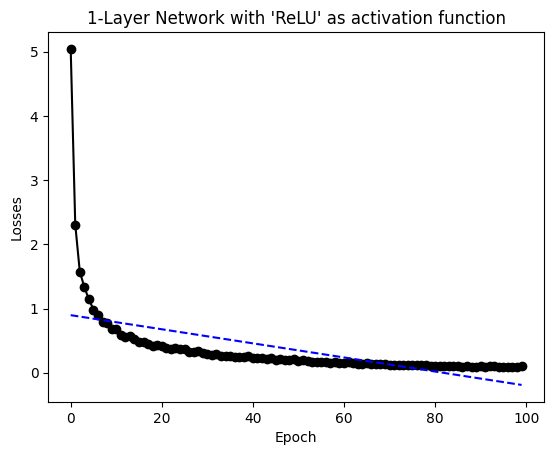

In [158]:
i = 0
print("\033[1m" + nets_name[i] + "\033[0m" + '\n')
TrainModelInBatches(model=nets[i],dl=dl_train,loss_func=nn.MSELoss(),optimizer=optim.SGD,eta=1e-2,batch_size=32,epochs=100)
plt.title(nets_name[i])
evaluate(nets[i],dl_test)

2-Layer Network with 'ReLU' as activation function

Epoch: 0 	 Batch: 0 	 Loss 28.260974884033203
Epoch: 0 	 Batch: 100 	 Loss 8.293776512145996
Epoch: 0 	 Batch: 200 	 Loss 5.876730442047119
Epoch: 0 	 Batch: 227 	 Loss 5.525611400604248
Epoch: 25 	 Batch: 0 	 Loss 0.34798869490623474
Epoch: 25 	 Batch: 100 	 Loss 0.2328176647424698
Epoch: 25 	 Batch: 200 	 Loss 0.2318733185529709
Epoch: 25 	 Batch: 227 	 Loss 0.23612403869628906
Epoch: 50 	 Batch: 0 	 Loss 0.11276097595691681
Epoch: 50 	 Batch: 100 	 Loss 0.08326467126607895
Epoch: 50 	 Batch: 200 	 Loss 0.08522050827741623
Epoch: 50 	 Batch: 227 	 Loss 0.09082937240600586
Epoch: 75 	 Batch: 0 	 Loss 0.01747100055217743
Epoch: 75 	 Batch: 100 	 Loss 0.036020927131175995
Epoch: 75 	 Batch: 200 	 Loss 0.04212488234043121
Epoch: 75 	 Batch: 227 	 Loss 0.04222150146961212
Accuracy is:  5.9790732436472345 %


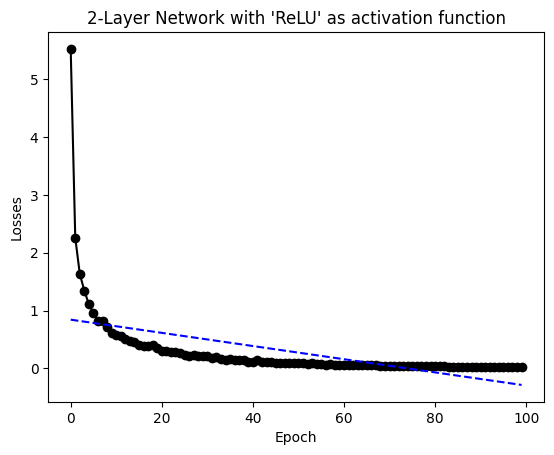

In [159]:
i = 1
print("\033[1m" + nets_name[i] + "\033[0m" + '\n')
TrainModelInBatches(model=nets[i],dl=dl_train,loss_func=nn.MSELoss(),optimizer=optim.SGD,eta=1e-2,batch_size=32,epochs=100)
plt.title(nets_name[i])
evaluate(nets[i],dl_test)

1-Layer Network with 'Tanh' as activation function

Epoch: 0 	 Batch: 0 	 Loss 0.016255494207143784
Epoch: 0 	 Batch: 100 	 Loss 0.022515693679451942
Epoch: 0 	 Batch: 200 	 Loss 0.022684834897518158
Epoch: 0 	 Batch: 227 	 Loss 0.02263452671468258
Epoch: 25 	 Batch: 0 	 Loss 0.011445981450378895
Epoch: 25 	 Batch: 100 	 Loss 0.016439925879240036
Epoch: 25 	 Batch: 200 	 Loss 0.018171435222029686
Epoch: 25 	 Batch: 227 	 Loss 0.0177766103297472
Epoch: 50 	 Batch: 0 	 Loss 0.013484759256243706
Epoch: 50 	 Batch: 100 	 Loss 0.015546221286058426
Epoch: 50 	 Batch: 200 	 Loss 0.01512881089001894
Epoch: 50 	 Batch: 227 	 Loss 0.014913535676896572
Epoch: 75 	 Batch: 0 	 Loss 0.008662590757012367
Epoch: 75 	 Batch: 100 	 Loss 0.011194754391908646
Epoch: 75 	 Batch: 200 	 Loss 0.01278646569699049
Epoch: 75 	 Batch: 227 	 Loss 0.012597816064953804
Accuracy is:  11.609367214748382 %


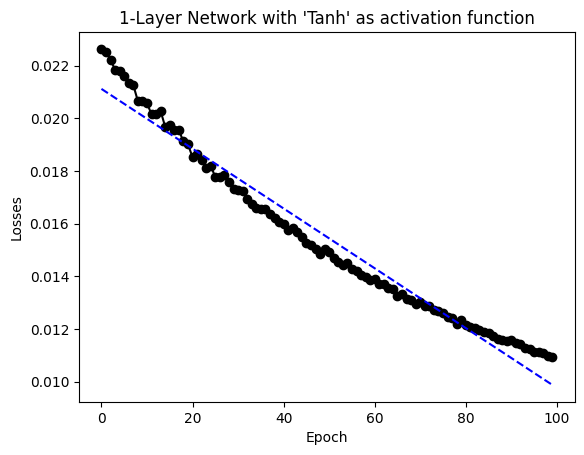

In [160]:
i = 2
print("\033[1m" + nets_name[i] + "\033[0m" + '\n')
TrainModelInBatches(model=nets[i],dl=dl_train,loss_func=nn.MSELoss(),optimizer=optim.SGD,eta=1e-2,batch_size=32,epochs=100)
plt.title(nets_name[i])
evaluate(nets[i],dl_test)

2-Layer Network with 'Tanh' as activation function

Epoch: 0 	 Batch: 0 	 Loss 0.009051518514752388
Epoch: 0 	 Batch: 100 	 Loss 0.010931124910712242
Epoch: 0 	 Batch: 200 	 Loss 0.011571965180337429
Epoch: 0 	 Batch: 227 	 Loss 0.011258319951593876
Epoch: 25 	 Batch: 0 	 Loss 0.0048831431195139885
Epoch: 25 	 Batch: 100 	 Loss 0.01287020929157734
Epoch: 25 	 Batch: 200 	 Loss 0.009892378002405167
Epoch: 25 	 Batch: 227 	 Loss 0.009533191099762917
Epoch: 50 	 Batch: 0 	 Loss 0.004089366178959608
Epoch: 50 	 Batch: 100 	 Loss 0.009383480064570904
Epoch: 50 	 Batch: 200 	 Loss 0.008543903939425945
Epoch: 50 	 Batch: 227 	 Loss 0.008271426893770695
Epoch: 75 	 Batch: 0 	 Loss 0.005172924604266882
Epoch: 75 	 Batch: 100 	 Loss 0.007751749828457832
Epoch: 75 	 Batch: 200 	 Loss 0.007724558003246784
Epoch: 75 	 Batch: 227 	 Loss 0.007421489804983139
Accuracy is:  11.061285500747385 %


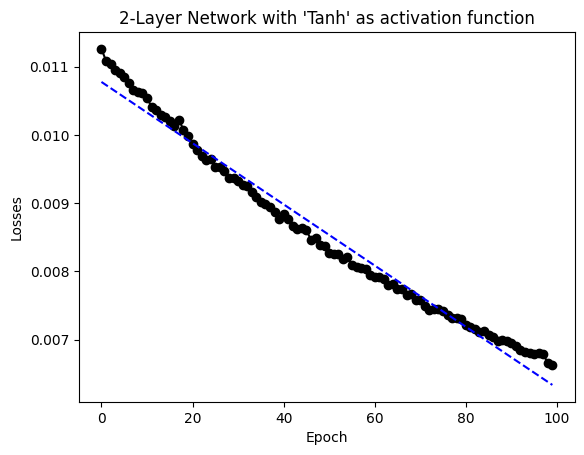

In [155]:
i = 3 
print("\033[1m" + nets_name[i] + "\033[0m" + '\n')
TrainModelInBatches(model=nets[i],dl=dl_train,loss_func=nn.MSELoss(),optimizer=optim.SGD,eta=1e-2,batch_size=32,epochs=100)
plt.title(nets_name[i])
evaluate(nets[i],dl_test)

1-Layer Network with 'Sigmoid' as activation function

Epoch: 0 	 Batch: 0 	 Loss 0.05521123856306076
Epoch: 0 	 Batch: 100 	 Loss 0.07456367462873459
Epoch: 0 	 Batch: 200 	 Loss 0.07542635500431061
Epoch: 0 	 Batch: 227 	 Loss 0.07557176053524017
Epoch: 25 	 Batch: 0 	 Loss 0.06347697973251343
Epoch: 25 	 Batch: 100 	 Loss 0.06851173937320709
Epoch: 25 	 Batch: 200 	 Loss 0.0702490508556366
Epoch: 25 	 Batch: 227 	 Loss 0.06946133822202682
Epoch: 50 	 Batch: 0 	 Loss 0.06041668727993965
Epoch: 50 	 Batch: 100 	 Loss 0.06314345449209213
Epoch: 50 	 Batch: 200 	 Loss 0.06350443512201309
Epoch: 50 	 Batch: 227 	 Loss 0.06377673894166946
Epoch: 75 	 Batch: 0 	 Loss 0.03503766655921936
Epoch: 75 	 Batch: 100 	 Loss 0.061720795929431915
Epoch: 75 	 Batch: 200 	 Loss 0.058964017778635025
Epoch: 75 	 Batch: 227 	 Loss 0.05882774665951729
Accuracy is:  12.556053811659194 %


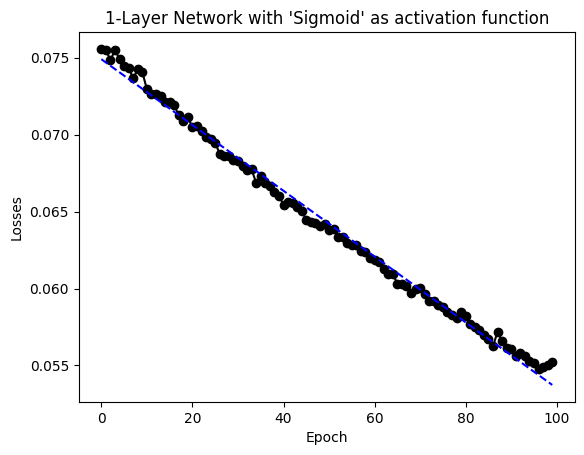

In [156]:
i = 4
print("\033[1m" + nets_name[i] + "\033[0m" + '\n')
TrainModelInBatches(model=nets[i],dl=dl_train,loss_func=nn.MSELoss(),optimizer=optim.SGD,eta=1e-2,batch_size=32,epochs=100)
plt.title(nets_name[i])
evaluate(nets[i],dl_test)

2-Layer Network with 'Sigmoid' as activation function

Epoch: 0 	 Batch: 0 	 Loss 25.969369888305664
Epoch: 0 	 Batch: 100 	 Loss 11.187989234924316
Epoch: 0 	 Batch: 200 	 Loss 10.079278945922852
Epoch: 0 	 Batch: 227 	 Loss 9.947768211364746
Epoch: 25 	 Batch: 0 	 Loss 0.3367287516593933
Epoch: 25 	 Batch: 100 	 Loss 0.8632286787033081
Epoch: 25 	 Batch: 200 	 Loss 0.8671556711196899
Epoch: 25 	 Batch: 227 	 Loss 0.8574339747428894
Epoch: 50 	 Batch: 0 	 Loss 0.3350023031234741
Epoch: 50 	 Batch: 100 	 Loss 0.3872382938861847
Epoch: 50 	 Batch: 200 	 Loss 0.3633231222629547
Epoch: 50 	 Batch: 227 	 Loss 0.37539950013160706
Epoch: 75 	 Batch: 0 	 Loss 0.3726242482662201
Epoch: 75 	 Batch: 100 	 Loss 0.24972331523895264
Epoch: 75 	 Batch: 200 	 Loss 0.24779517948627472
Epoch: 75 	 Batch: 227 	 Loss 0.24915219843387604
Accuracy is:  3.7369207772795217 %


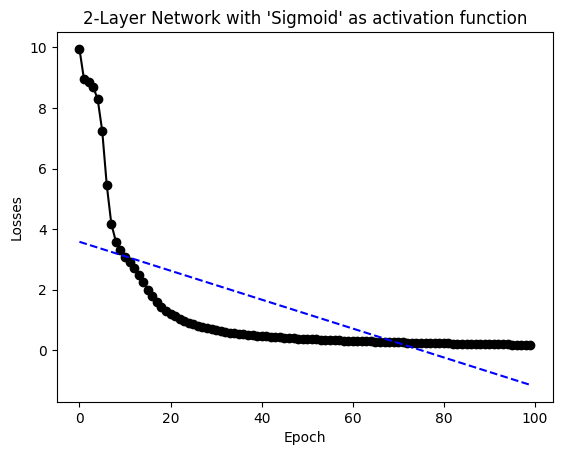

In [157]:
i = 5
print("\033[1m" + nets_name[i] + "\033[0m" + '\n')
TrainModelInBatches(model=nets[i],dl=dl_train,loss_func=nn.MSELoss(),optimizer=optim.SGD,eta=1e-2,batch_size=32,epochs=100)
plt.title(nets_name[i])
evaluate(nets[i],dl_test)